In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import re
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [124]:
age=pd.read_csv('../input/covid19-in-india/AgeGroupDetails.csv')
covid19=pd.read_csv('../input/covid19-in-india/covid_19_india.csv')
h_beds=pd.read_csv('../input/covid19-in-india/HospitalBedsIndia.csv')
individual_details=pd.read_csv('../input/covid19-in-india/IndividualDetails.csv')

In [125]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sno         10 non-null     int64 
 1   AgeGroup    10 non-null     object
 2   TotalCases  10 non-null     int64 
 3   Percentage  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [126]:
age.fillna(0,inplace=True)
age

Sno AgeGroup  TotalCases Percentage
0    1      0-9          22      3.18%
1    2    10-19          27      3.90%
2    3    20-29         172     24.86%
3    4    30-39         146     21.10%
4    5    40-49         112     16.18%
5    6    50-59          77     11.13%
6    7    60-69          89     12.86%
7    8    70-79          28      4.05%
8    9     >=80          10      1.45%
9   10  Missing           9      1.30%

In [127]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5861 entries, 0 to 5860
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       5861 non-null   int64 
 1   Date                      5861 non-null   object
 2   Time                      5861 non-null   object
 3   State/UnionTerritory      5861 non-null   object
 4   ConfirmedIndianNational   5861 non-null   object
 5   ConfirmedForeignNational  5861 non-null   object
 6   Cured                     5861 non-null   int64 
 7   Deaths                    5861 non-null   int64 
 8   Confirmed                 5861 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 412.2+ KB


In [128]:
covid19.fillna(0,inplace=True)
covid19

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0        1  30/01/20  6:00 PM               Kerala                       1   
1        2  31/01/20  6:00 PM               Kerala                       1   
2        3  01/02/20  6:00 PM               Kerala                       2   
3        4  02/02/20  6:00 PM               Kerala                       3   
4        5  03/02/20  6:00 PM               Kerala                       3   
...    ...       ...      ...                  ...                     ...   
5856  5857  02/09/20  8:00 AM            Telengana                       -   
5857  5858  02/09/20  8:00 AM              Tripura                       -   
5858  5859  02/09/20  8:00 AM          Uttarakhand                       -   
5859  5860  02/09/20  8:00 AM        Uttar Pradesh                       -   
5860  5861  02/09/20  8:00 AM          West Bengal                       -   

     ConfirmedForeignNational   Cured  Deaths  Confirmed  
0                           0       0       0          1  
1                           0       0       0          1  
2                           0       0       0          2  
3                           0       0       0          3  
4                           0       0       0          3  
...                       ...     ...     ...        ...  
5856                        -   97402     846     130589  
5857                        -    7847     118      12702  
5858                        -   14076     280      20398  
5859                        -  176677    3542     235757  
5860                        -  137616    3283     165721  

[5861 rows x 9 columns]

In [129]:
h_beds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               37 non-null     int64  
 1   State/UT                          37 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      37 non-null     object 
 3   NumCommunityHealthCenters_HMIS    37 non-null     int64  
 4   NumSubDistrictHospitals_HMIS      30 non-null     float64
 5   NumDistrictHospitals_HMIS         37 non-null     int64  
 6   TotalPublicHealthFacilities_HMIS  37 non-null     int64  
 7   NumPublicBeds_HMIS                37 non-null     int64  
 8   NumRuralHospitals_NHP18           37 non-null     int64  
 9   NumRuralBeds_NHP18                37 non-null     int64  
 10  NumUrbanHospitals_NHP18           37 non-null     int64  
 11  NumUrbanBeds_NHP18                37 non-null     int64  
dtypes: float64

In [130]:
h_beds.fillna(0,inplace=True)
h_beds

Sno                   State/UT NumPrimaryHealthCenters_HMIS  \
0     1  Andaman & Nicobar Islands                           27   
1     2             Andhra Pradesh                         1417   
2     3          Arunachal Pradesh                          122   
3     4                      Assam                         1007   
4     5                      Bihar                         2007   
5     6                 Chandigarh                           40   
6     7               Chhattisgarh                          813   
7     8       Dadra & Nagar Haveli                            9   
8     9                Daman & Diu                            4   
9    10                      Delhi                          534   
10   11                        Goa                           31   
11   12                    Gujarat                         1770   
12   13                    Haryana                          500   
13   14           Himachal Pradesh                          516   
14   15            Jammu & Kashmir                          702   
15   16                  Jharkhand                          343   
16   17                  Karnataka                         2547   
17   18                     Kerala                          933   
18   19                Lakshadweep                            4   
19   20             Madhya Pradesh                         1420   
20   21                Maharashtra                         2638   
21   22                    Manipur                           87   
22   23                  Meghalaya                          138   
23   24                    Mizoram                           65   
24   25                   Nagaland                          134   
25   26                     Odisha                         1360   
26   27                 Puducherry                           40   
27   28                     Punjab                          521   
28   29                  Rajasthan                         2463   
29   30                     Sikkim                           25   
30   31                 Tamil Nadu                         1854   
31   32                  Telangana                          788   
32   33                    Tripura                          114   
33   34              Uttar Pradesh                         3277   
34   35                Uttarakhand                          275   
35   36                West Bengal                         1374   
36   37                  All India                       29,899   

    NumCommunityHealthCenters_HMIS  NumSubDistrictHospitals_HMIS  \
0                                4                           0.0   
1                              198                          31.0   
2                               62                           0.0   
3                              166                          14.0   
4                               63                          33.0   
5                                2                           1.0   
6                              166                          12.0   
7                                2                           1.0   
8                                2                           0.0   
9                               25                           9.0   
10                               4                           2.0   
11                             385                          44.0   
12                             131                          24.0   
13                              79                          61.0   
14                              87                           0.0   
15                             179                          13.0   
16                             207                         147.0   
17                             229                          82.0   
18                               3                           2.0   
19                             324                          72.0   
20                           

In [131]:
individual_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28182 entries, 0 to 28181
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  28182 non-null  int64 
 1   government_id       2997 non-null   object
 2   diagnosed_date      28182 non-null  object
 3   age                 2346 non-null   object
 4   gender              5313 non-null   object
 5   detected_city       2350 non-null   object
 6   detected_district   21198 non-null  object
 7   detected_state      28182 non-null  object
 8   nationality         2709 non-null   object
 9   current_status      28182 non-null  object
 10  status_change_date  27780 non-null  object
 11  notes               26847 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.6+ MB


In [132]:
individual_details.fillna(0,inplace=True)
individual_details

id government_id diagnosed_date age gender  \
0          0      KL-TS-P1     30/01/2020  20      F   
1          1      KL-AL-P1     02/02/2020   0      0   
2          2      KL-KS-P1     03/02/2020   0      0   
3          3         DL-P1     02/03/2020  45      M   
4          4         TS-P1     02/03/2020  24      M   
...      ...           ...            ...  ..    ...   
28177  28178             0     22/04/2020   0      0   
28178  28179             0     24/04/2020   0      0   
28179  28180             0     24/04/2020   0      0   
28180  28181             0     25/04/2020   0      0   
28181  28182             0     25/04/2020   0      0   

                  detected_city detected_district detected_state nationality  \
0                      Thrissur          Thrissur         Kerala       India   
1                     Alappuzha         Alappuzha         Kerala       India   
2                     Kasaragod         Kasaragod         Kerala       India   
3      East Delhi (Mayur Vihar)        East Delhi          Delhi       India   
4                     Hyderabad         Hyderabad      Telangana       India   
...                         ...               ...            ...         ...   
28177                         0                 0    Maharashtra           0   
28178                         0            Nagpur    Maharashtra           0   
28179                         0                 0    Maharashtra           0   
28180                         0            Nagpur    Maharashtra           0   
28181                         0                 0    Maharashtra           0   

      current_status status_change_date  \
0          Recovered         14/02/2020   
1          Recovered         14/02/2020   
2          Recovered         14/02/2020   
3          Recovered         15/03/2020   
4          Recovered         02/03/2020   
...              ...                ...   
28177   Hospitalized                  0   
28178   Hospitalized                  0   
28179   Hospitalized                  0   
28180   Hospitalized                  0   
28181   Hospitalized                  0   

                                                   notes  
0                                   Travelled from Wuhan  
1                                   Travelled from Wuhan  
2                                   Travelled from Wuhan  
3                          Travelled from Austria, Italy  
4      Travelled from Dubai to Bangalore on 20th Feb,...  
...                                                  ...  
28177                      Correction for district count  
28178                      Correction for district count  
28179                      Correction for district count  
28180                      Correction for district count  
28181                      Correction for district count  

[28182 rows x 12 columns]

In [133]:
covid19['Active'] = covid19['Confirmed'] - covid19['Cured'] - covid19['Deaths']
covid19 = covid19.sort_values(['Date', 'State/UnionTerritory']).reset_index(drop=True)

In [134]:
covid19['Date'] = pd.to_datetime(covid19['Date'])
covid19= covid19.drop(['Sno','Time','ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1)
covid19

Date         State/UnionTerritory   Cured  Deaths  Confirmed  \
0    2020-01-02                       Kerala       0       0          2   
1    2020-01-03                       Kerala       0       0          3   
2    2020-01-04  Andaman and Nicobar Islands       0       0         10   
3    2020-01-04               Andhra Pradesh       1       0         83   
4    2020-01-04                        Assam       0       0          1   
...         ...                          ...     ...     ...        ...   
5856 2020-08-31                    Telengana   92837     827     124963   
5857 2020-08-31                      Tripura    7433     103      11644   
5858 2020-08-31                Uttar Pradesh  167543    3423     225632   
5859 2020-08-31                  Uttarakhand   13066     257      19235   
5860 2020-08-31                  West Bengal  130952    3176     159785   

      Active  
0          2  
1          3  
2         10  
3         82  
4          1  
...      ...  
5856   31299  
5857    4108  
5858   54666  
5859    5912  
5860   25657  

[5861 rows x 6 columns]

In [135]:
covid19.sort_values('Confirmed', ascending= False).style\
    .background_gradient(cmap='BrBG_r', subset=['Confirmed'])\
    .background_gradient(cmap='Dark2_r', subset=["Deaths"])\
    .background_gradient(cmap='Purples',subset=['Cured'])\
    .background_gradient(cmap='summer', subset=['Active'])

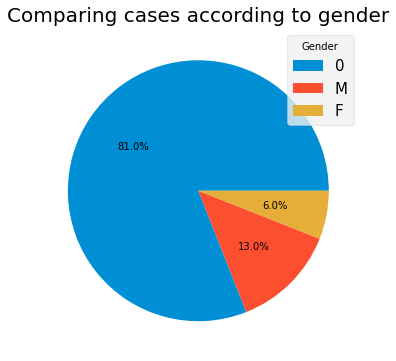

In [136]:
from collections import Counter
gender=individual_details.gender
gender.dropna(inplace=True)
gender=gender.value_counts()
per=[]
for i in gender:
    perc=i/gender.sum()
    per.append(format(perc,'.2f'))
plt.figure(figsize=(10,6))    
plt.title('Comparing cases according to gender',fontsize=20)
plt.pie(per,autopct='%1.1f%%')
plt.legend(gender.index,loc='best',title='Gender',fontsize=15)

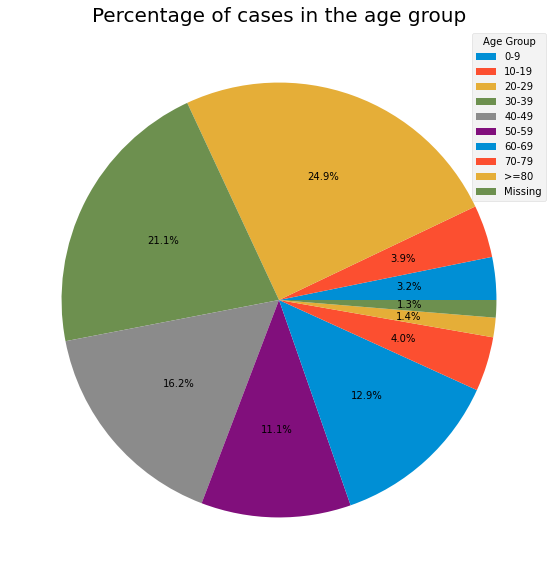

In [137]:
perc=[]
for i in age['Percentage']:
    per=float(re.findall("\d+\.\d+",i)[0])
    perc.append(per)
age['Percentage']=perc
plt.figure(figsize=(20,10))
plt.title('Percentage of cases in the age group',fontsize=20)
plt.pie(age['Percentage'],autopct='%1.1f%%')
plt.legend(age['AgeGroup'],loc='best',title='Age Group')

In [138]:
india= covid19[covid19['Date'] == covid19['Date'].max()].copy().fillna(0)
india.index = india["State/UnionTerritory"]
india= india.drop(['State/UnionTerritory', 'Date'], axis=1)

In [139]:
df = pd.DataFrame(pd.to_numeric(india.sum()),dtype=np.float64).transpose()
df.style.background_gradient(cmap='summer',axis=1)

In [143]:
fig = px.bar(covid19.sort_values('Deaths', ascending= False).sort_values('Deaths', ascending=True), 
             x="Deaths", y="State/UnionTerritory", 
             title='Total Deaths Cases', 
             text='Confirmed', 
             orientation='h', 
             width=700, height=1000)
fig.update_traces(marker_color='#FF0000', opacity=0.8, textposition='inside')

fig.update_layout(template = 'plotly_white')
fig.show()

In [146]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2)
colors = ['yellow', 'orange', 'crimson','mediumturquoise', 'sandybrown', 'grey',  'lightgreen','navy','pink','purple']
trace1 = go.Pie(
                labels=age.AgeGroup,
                values=age.TotalCases,
                hoverinfo='label+percent', 
                textfont_size=12,
                marker=dict(colors=colors, 
                            line=dict(color='#000000', width=2)))
layout = go.Layout(width=700, height=500,
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()


In [147]:
fig = go.Figure(data=[
    go.Bar(name='Cases', x=age['AgeGroup'], y=age['TotalCases']),
])
# Change the bar mode
fig.update_layout(barmode='overlay')
fig.update_layout(hovermode='closest',template='seaborn',width=700,xaxis=dict(mirror=True,linewidth=2,linecolor='black',showgrid=False),
                 yaxis=dict(mirror=True,linewidth=2,linecolor='black'))
fig.show()

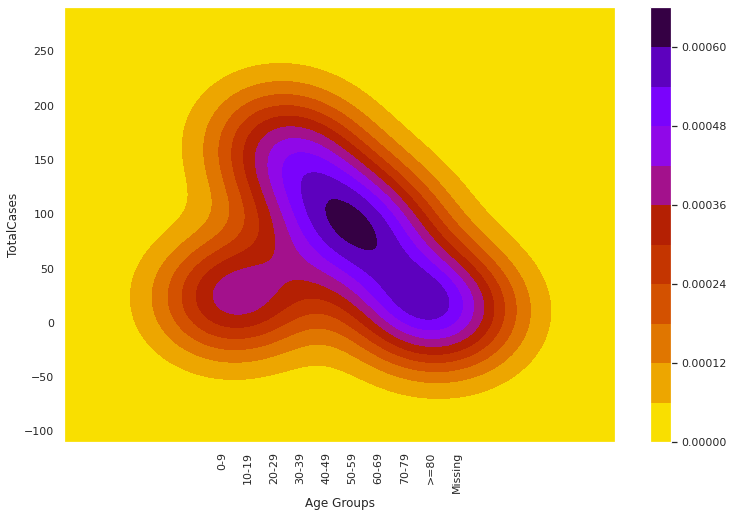

In [151]:
sns.set(rc={'figure.figsize':(11,8)})
x=age.AgeGroup
y=age.TotalCases
y_pos=np.arange(len(x))
plt.xticks(y_pos,x)
plt.xticks(rotation=90)
plt.xlabel('Age Groups')


ax=sns.kdeplot(y_pos,y,cmap='gnuplot_r',shade=True,cbar=True)

In [161]:
hosp1=h_beds.select_dtypes(include=['float64','int64'])
hosp2=h_beds.select_dtypes(include=['object'])
obj=list(h_beds.columns[2:8])

for ob in obj:
    h_beds[ob]=h_beds[ob].astype(int,errors='ignore')

<Figure size 792x576 with 0 Axes>

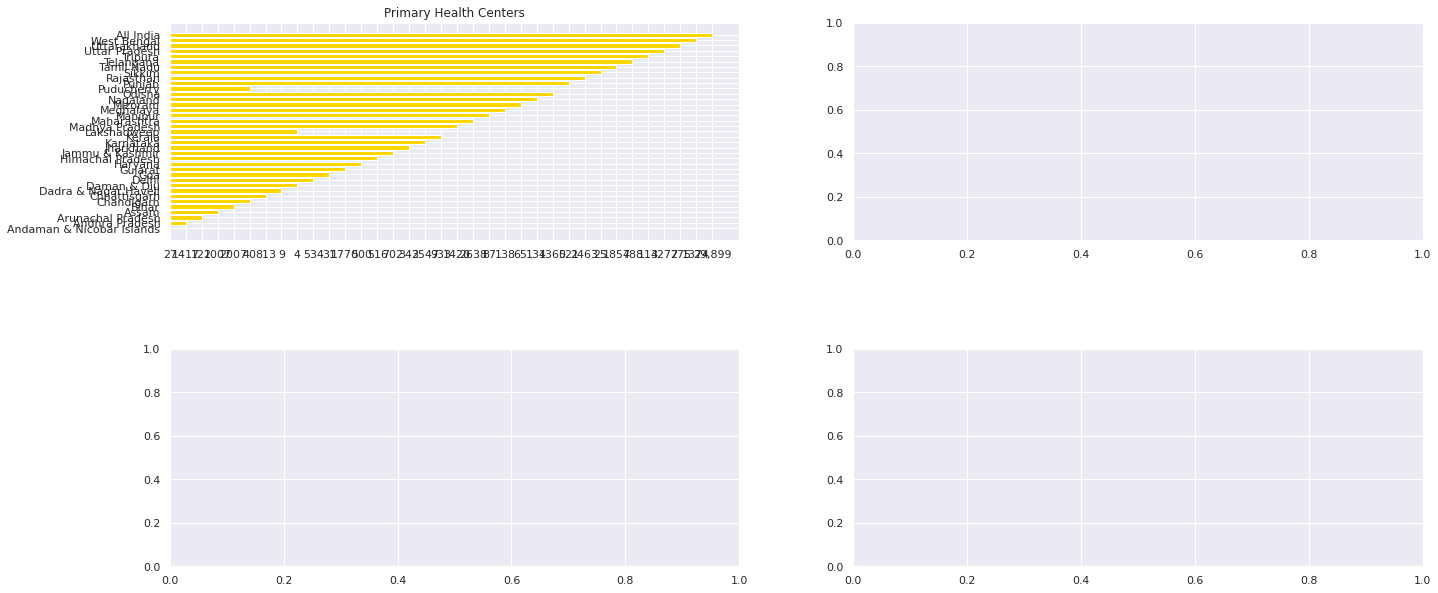

In [163]:
plt.suptitle('HEALTH FACILITIES STATEWISE',fontsize=20)
fig = plt.figure(figsize=(20,10)) 
plt1 = fig.add_subplot(221) 
plt2 = fig.add_subplot(222) 
plt3 = fig.add_subplot(223) 
plt4 = fig.add_subplot(224) 
plt1.set_title('Primary Health Centers')
plt1.barh(h_beds['State/UT'],h_beds['NumPrimaryHealthCenters_HMIS'],color ='gold');

plt2.set_title('Community Health Centers')
plt2.barh(h_beds['State/UT'],h_beds['NumCommunityHealthCenters_HMIS'],color='coral')

plt3.set_title("District Hospitals")
plt3.barh(h_beds['State/UT'],h_beds['NumDistrictHospitals_HMIS'],color='lightskyblue')

plt4.set_title('PUblic Health Facilities')
plt4.barh(h_beds['State/UT'],h_beds['TotalPublicHealthFacilities_HMIS'],color='violet')

fig.subplots_adjust(hspace=.5,wspace=0.2) 